In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import os
import seaborn as sns
import sklearn
import statsmodels.api as sm

In [2]:
#定位到工作路径
os.getcwd()
os.chdir('/home/jovyan/work/MRES/CASA0007QM/task1')
#载入任务数据
d1 = pd.read_csv('coursework_1_data_2019.csv')

In [3]:
d1.columns

Index(['local_authority_area', 'region', 'local_authority_type',
       '2008_cases_total', '2013_cases_total', '2018_cases_total',
       '2008_pop_total', '2013_pop_total', '2018_pop_total', '2008_cases_male',
       '2013_cases_male', '2018_cases_male', '2008_pop_male', '2013_pop_male',
       '2018_pop_male', '2008_cases_female', '2013_cases_female',
       '2018_cases_female', '2008_pop_female', '2013_pop_female',
       '2018_pop_female', 'total_budget', 'clean_air', 'clean_environ',
       'health_training', 'school_awareness', 'media_awareness',
       'sub_counselling'],
      dtype='object')

In [4]:
#计算肥胖率和肥胖数目在2008与2018年的变化
d1['2008rate'] = d1['2008_cases_total']/d1['2008_pop_total']
d1['2018rate'] = d1['2018_cases_total']/d1['2018_pop_total']
d1['Difference of Proportion(DoP)'] = (d1['2018rate']-d1['2008rate'])
d1['(18-08)case difference']=d1['2018_cases_total']-d1['2008_cases_total']
d1['population difference']=d1['2018_pop_total']-d1['2008_pop_total']
d1['clean_air'] = d1['clean_air']/d1['total_budget']
d1['clean_environ'] = d1['clean_environ']/d1['total_budget']
d1['health_training'] = d1['health_training']/d1['total_budget']
d1['school_awareness'] = d1['school_awareness']/d1['total_budget']
d1['media_awareness'] = d1['media_awareness']/d1['total_budget']
d1['sub_counselling'] = d1['sub_counselling']/d1['total_budget']

In [5]:
#了解各类当局的数量_dataframe
d1['local_authority_type'].value_counts()

unitary_authority          56
metropolitan_borough       36
london_borough             32
non_metropolitan_county    27
other_london                1
Name: local_authority_type, dtype: int64

In [6]:
d1_drop_city = d1.drop(d1[d1.local_authority_type =='other_london'].index.values, axis=0)

<AxesSubplot:xlabel='local_authority_type', ylabel='Difference of Proportion(DoP)'>

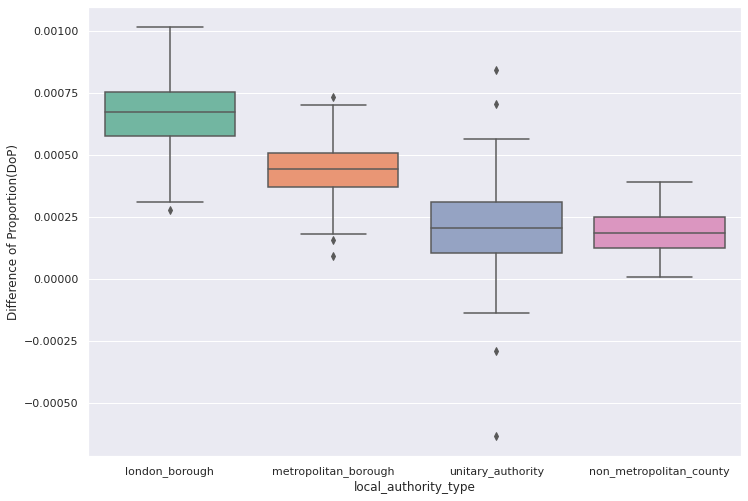

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot( x=d1_drop_city['local_authority_type'], y=d1_drop_city['Difference of Proportion(DoP)'],palette="Set2")


In [9]:
local_authority = list(d1_drop_city.local_authority_type.unique())
local_authority

['london_borough',
 'metropolitan_borough',
 'unitary_authority',
 'non_metropolitan_county']

In [15]:
d2 = d1_drop_city[["local_authority_type",'Difference of Proportion(DoP)','total_budget','population difference']]

In [17]:
d3 = d1_drop_city[["local_authority_type",'Difference of Proportion(DoP)','total_budget']]

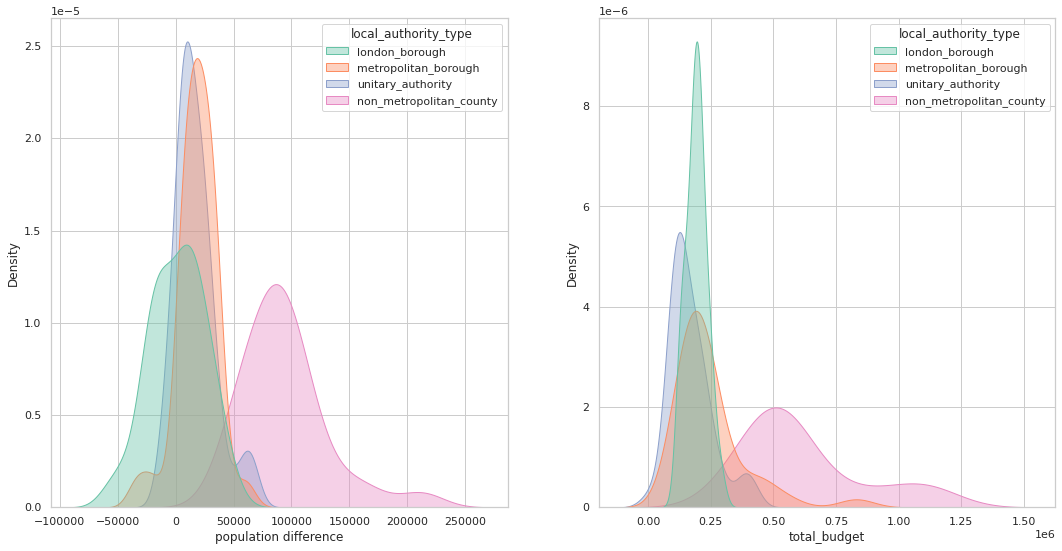

In [20]:
import seaborn as sns
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=18,9

# set seaborn whitegrid theme
sns.set(style="whitegrid")
fig, ax =plt.subplots(1,2)
sns.kdeplot(data=d2, x='population difference' , hue='local_authority_type', fill=True, common_norm=False,alpha=0.4,ax=ax[0],palette="Set2")
sns.kdeplot(data=d2, x='total_budget', hue='local_authority_type', fill=True, common_norm=False,alpha=0.4,ax=ax[1],palette="Set2")
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


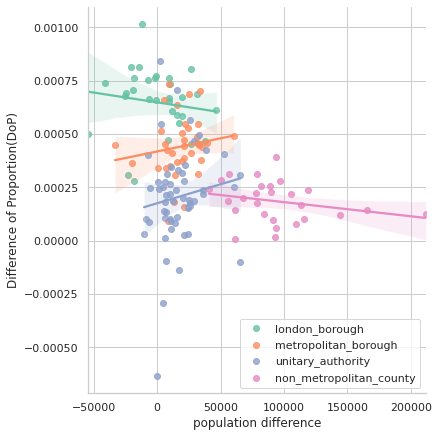

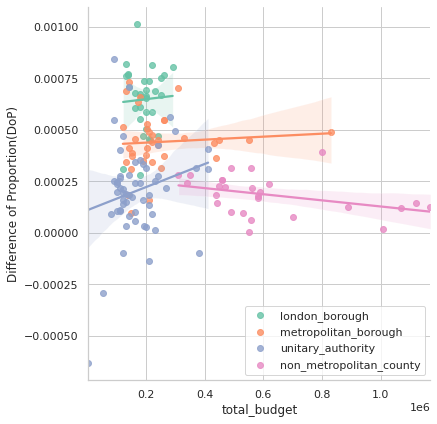

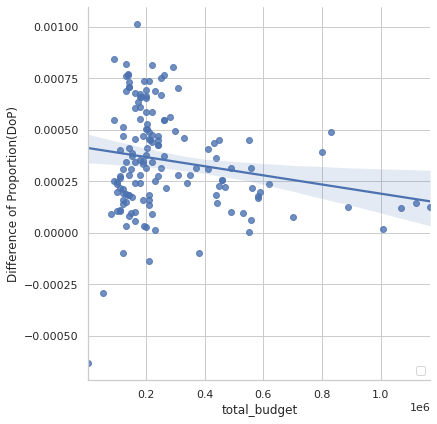

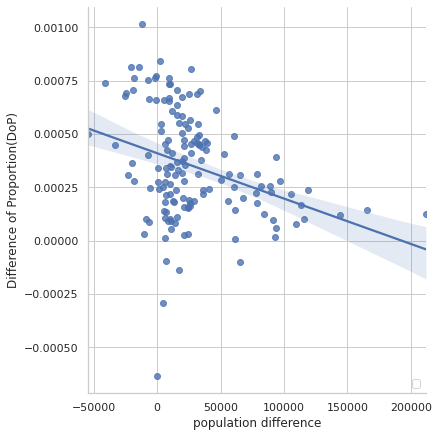

In [21]:
sns.lmplot( x='population difference', y="Difference of Proportion(DoP)", data=d2, fit_reg=True, hue='local_authority_type', legend=False, palette="Set2",height = 6)
plt.legend(loc='lower right')
sns.lmplot( x="total_budget", y="Difference of Proportion(DoP)", data=d2, fit_reg=True, hue='local_authority_type', legend=False, palette="Set2",height = 6)
plt.legend(loc='lower right')
sns.lmplot( x='total_budget', y="Difference of Proportion(DoP)", data=d2, fit_reg=True, legend=False, palette="Set2",height = 6)
plt.legend(loc='lower right')
sns.lmplot( x='population difference', y="Difference of Proportion(DoP)", data=d2, fit_reg=True, legend=False, palette="Set2",height = 6)
plt.legend(loc='lower right')

In [22]:
d4 = d1_drop_city[["local_authority_type",'Difference of Proportion(DoP)','population difference','total_budget','clean_air', 'clean_environ',
       'health_training', 'school_awareness', 'media_awareness',
       'sub_counselling']]

In [29]:
#提取伦敦
d_london = d1_drop_city[d1_drop_city.local_authority_type=='london_borough'][['local_authority_type','Difference of Proportion(DoP)','total_budget','clean_air','clean_environ',
       'health_training','school_awareness', 'media_awareness','sub_counselling']]
d_metropolitan_borough = d1_drop_city[d1_drop_city.local_authority_type=='metropolitan_borough'][['local_authority_type','Difference of Proportion(DoP)','total_budget','clean_air','clean_environ',
       'health_training','school_awareness', 'media_awareness',
       'sub_counselling']]
d_non_metropolitan_county = d1_drop_city[d1_drop_city.local_authority_type=='non_metropolitan_county'][['local_authority_type','Difference of Proportion(DoP)','total_budget','clean_air','clean_environ',
       'health_training','school_awareness', 'media_awareness',
       'sub_counselling']]
d_unitary_authority = d1_drop_city[d1_drop_city.local_authority_type=='unitary_authority'][['local_authority_type','Difference of Proportion(DoP)','total_budget','clean_air','clean_environ',
       'health_training','school_awareness', 'media_awareness',
       'sub_counselling']]

#提取大都会

#提取非大都会
#提取unitary

<AxesSubplot:>

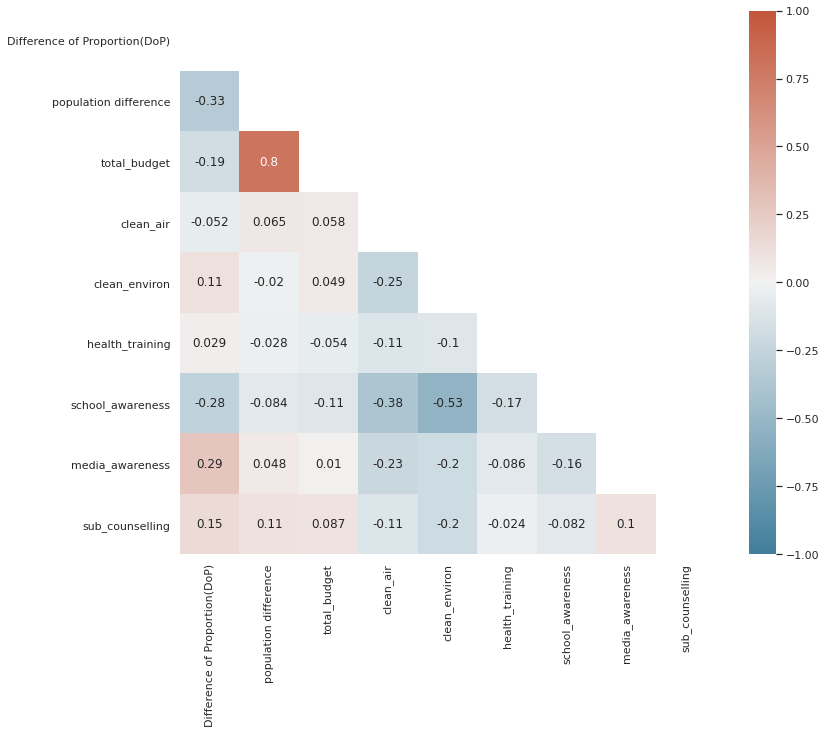

In [24]:
# Correlation between different variables
#
f, ax = plt.subplots(figsize=(12, 10))
corr = d4.corr()
#
# Set up the matplotlib plot configuration
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap 
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap,vmin = -1,vmax = 1)


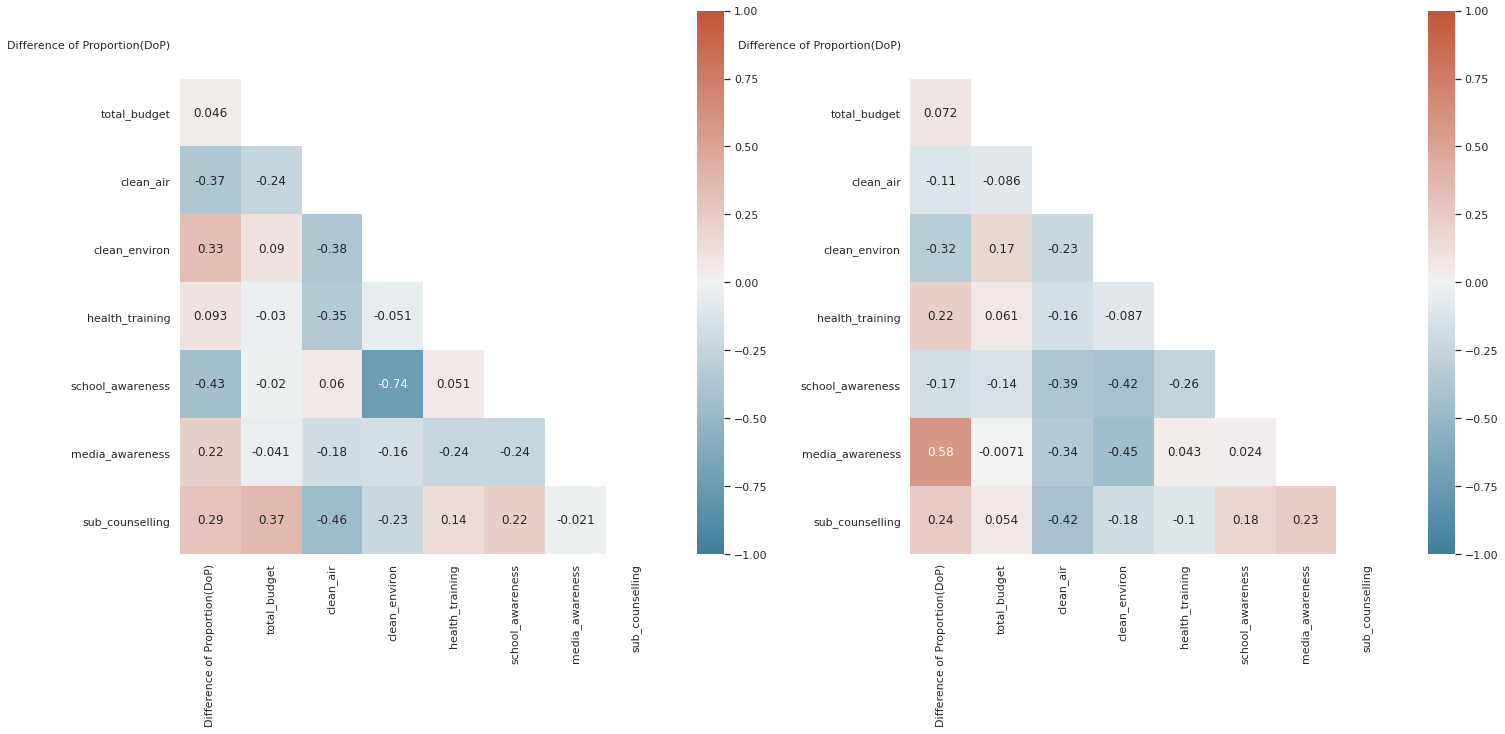

In [31]:
# Correlation between different variables
#
f, ax = plt.subplots(1,2,figsize=(24, 10))
corr1 = d_london.corr()
#
# Set up the matplotlib plot configuration
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr1, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap 
#
sns.heatmap(corr1, annot=True, mask = mask, cmap=cmap, ax=ax[0],vmin = -1,vmax = 1)

# Correlation between different variables
#
corr2 = d_metropolitan_borough.corr()
#
# Set up the matplotlib plot configuration

#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr2, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap 

#
sns.heatmap(corr2, annot=True, mask = mask, cmap=cmap, ax=ax[1],vmin = -1,vmax = 1)

plt.show()

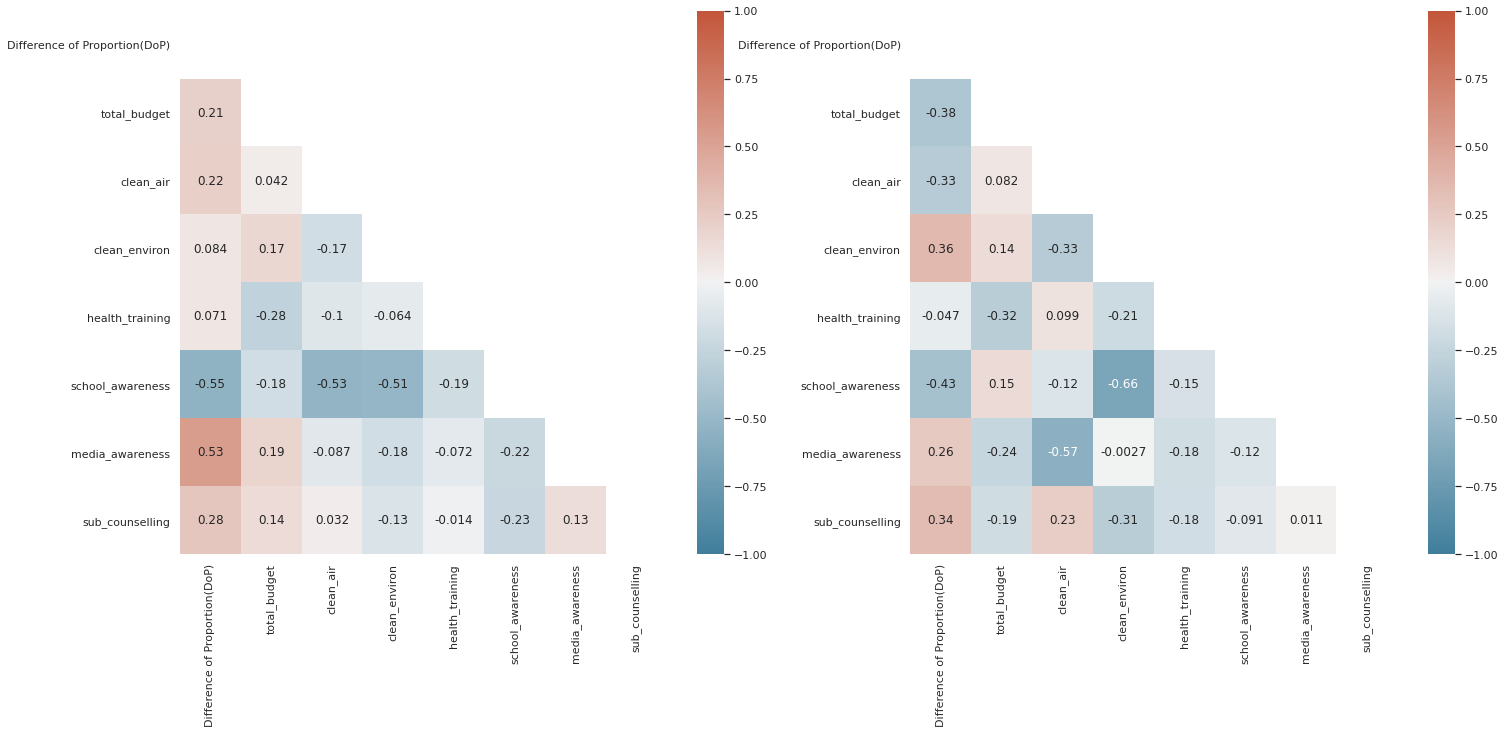

In [32]:
f, ax = plt.subplots(1,2,figsize=(24, 10))

corr3 = d_unitary_authority.corr()
#
# Set up the matplotlib plot configuration

#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr3, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap 

#
sns.heatmap(corr3, annot=True, mask = mask, cmap=cmap, ax=ax[0],vmin = -1,vmax = 1)


# Correlation between different variables
#
corr4 = d_non_metropolitan_county.corr()
#
# Set up the matplotlib plot configuration
#
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr4, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap 

#
sns.heatmap(corr4, annot=True, mask = mask, cmap=cmap, ax=ax[1],vmin = -1,vmax = 1)

plt.show()


In [27]:
d4_numeric = pd.get_dummies(d4)

In [28]:
d4_numeric.columns

Index(['Difference of Proportion(DoP)', 'population difference',
       'total_budget', 'clean_air', 'clean_environ', 'health_training',
       'school_awareness', 'media_awareness', 'sub_counselling',
       'local_authority_type_london_borough',
       'local_authority_type_metropolitan_borough',
       'local_authority_type_non_metropolitan_county',
       'local_authority_type_unitary_authority'],
      dtype='object')

In [24]:
d4_numeric_final = d4_numeric.drop(['local_authority_type_unitary_authority'], axis=1)

# double check the result
d4_numeric_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 151
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Difference of Proportion(DoP)                 151 non-null    float64
 1   population difference                         151 non-null    int64  
 2   total_budget                                  151 non-null    int64  
 3   clean_air                                     151 non-null    float64
 4   clean_environ                                 151 non-null    float64
 5   health_training                               151 non-null    float64
 6   school_awareness                              151 non-null    float64
 7   media_awareness                               151 non-null    float64
 8   sub_counselling                               151 non-null    float64
 9   local_authority_type_london_borough           151 non-null    uin

In [25]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [26]:
df_predictors_selected_VIF = drop_column_using_vif_(d4_numeric_final.drop('Difference of Proportion(DoP)', axis=1))

Dropping: clean_air


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [28]:
model_d4_numeric_final = sm.OLS(endog=d4_numeric_final[['Difference of Proportion(DoP)']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_d4_numeric_final.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Difference of Proportion(DoP)   R-squared:                       0.717
Model:                                       OLS   Adj. R-squared:                  0.697
Method:                            Least Squares   F-statistic:                     35.44
Date:                           Thu, 11 Nov 2021   Prob (F-statistic):           1.37e-33
Time:                                   17:03:54   Log-Likelihood:                 1132.8
No. Observations:                            151   AIC:                            -2244.
Df Residuals:                                140   BIC:                            -2210.
Df Model:                                     10                                         
Covariance Type:                       nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0001      0.000      0.953      0.342      -0.000       0.000
population difference                        -1.873e-10   5.87e-10     -0.319      0.750   -1.35e-09    9.73e-10
total_budget                                  4.713e-11   1.01e-10      0.465      0.643   -1.53e-10    2.48e-10
clean_environ                                -2.854e-06      0.000     -0.017      0.986      -0.000       0.000
health_training                                  0.0003      0.000      0.959      0.339      -0.000       0.001
school_awareness                                -0.0006      0.000     -4.214      0.000      -0.001      -0.000
media_awareness                                  0.0012      0.000      5.059      0.000       0.001       0.002
sub_counselling                                  0.0011      0.000      3.039      0.003       0.000       0.002
local_authority_type_london_borough              0.0004   3.25e-05     13.607      0.000       0.000       0.001
local_authority_type_metropolitan_borough        0.0002   3.07e-05      7.418      0.000       0.000       0.000
local_authority_type_non_metropolitan_county -6.248e-05   5.55e-05     -1.126      0.262      -0.000    4.72e-05
==============================================================================
Omnibus:                        9.619   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               19.240
Skew:                           0.172   Prob(JB):                     6.64e-05
Kurtosis:                       4.715   Cond. No.                     1.20e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
d_unitary_authority_1 = d1_drop_city[d1_drop_city.local_authority_type=='unitary_authority'][['Difference of Proportion(DoP)','population difference','total_budget','clean_air','clean_environ',
       'health_training','school_awareness', 'media_awareness','sub_counselling']]
df_predictors_selected_VIF = drop_column_using_vif_(d_unitary_authority_1.drop('Difference of Proportion(DoP)', axis=1))

Dropping: clean_air


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [30]:
model_d_unitary_authority = sm.OLS(endog=d_unitary_authority_1[['Difference of Proportion(DoP)']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_d_unitary_authority.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Difference of Proportion(DoP)   R-squared:                       0.497
Model:                                       OLS   Adj. R-squared:                  0.424
Method:                            Least Squares   F-statistic:                     6.787
Date:                           Thu, 11 Nov 2021   Prob (F-statistic):           1.32e-05
Time:                                   17:04:02   Log-Likelihood:                 410.46
No. Observations:                             56   AIC:                            -804.9
Df Residuals:                                 48   BIC:                            -788.7
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0001      0.000      0.715      0.478      -0.000       0.001
population difference -3.047e-11   1.83e-09     -0.017      0.987   -3.71e-09    3.65e-09
total_budget           1.569e-10   3.66e-10      0.429      0.670   -5.78e-10    8.92e-10
clean_environ            -0.0002      0.000     -0.515      0.609      -0.001       0.000
health_training           0.0001      0.001      0.220      0.827      -0.001       0.001
school_awareness         -0.0008      0.000     -3.125      0.003      -0.001      -0.000
media_awareness           0.0016      0.000      3.405      0.001       0.001       0.003
sub_counselling           0.0007      0.001      0.919      0.363      -0.001       0.002
==============================================================================
Omnibus:                        3.232   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.965
Skew:                           0.013   Prob(JB):                        0.227
Kurtosis:                       4.127   Cond. No.                     6.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""